## Brief Description on the dataset
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

The fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

##Download Data
To download the data, we use wget from the cloud storage provided by IBM


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-09-03 03:44:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-09-03 03:44:22 (1.89 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
fuel_data=pd.read_csv("FuelConsumption.csv")
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
fuel_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


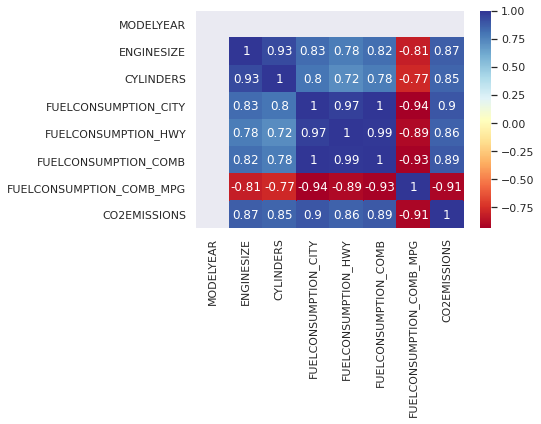

In [13]:
import seaborn as sns
sns.heatmap(fuel_data.corr(),cmap="RdYlBu",annot=True)
plt.show()

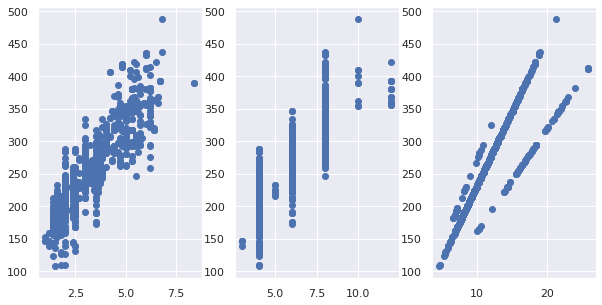

In [19]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].scatter(fuel_data.ENGINESIZE,fuel_data.CO2EMISSIONS)
ax[1].scatter(fuel_data.CYLINDERS,fuel_data.CO2EMISSIONS)
ax[2].scatter(fuel_data.FUELCONSUMPTION_COMB,fuel_data.CO2EMISSIONS)
plt.show()

In [27]:
mask=np.random.rand(len(fuel_data))>0.8

In [28]:
train=fuel_data[mask]
test=fuel_data[~mask]

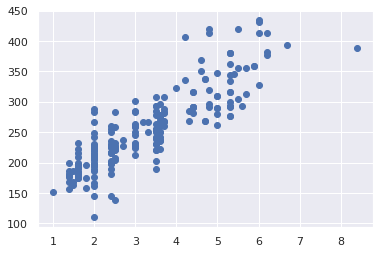

In [30]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.show()

In [32]:
from sklearn import linear_model

In [33]:
lr=linear_model.LinearRegression()

In [38]:
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(lr.coef_)
print(lr.intercept_)

[[39.21516853]]
[126.46092375]


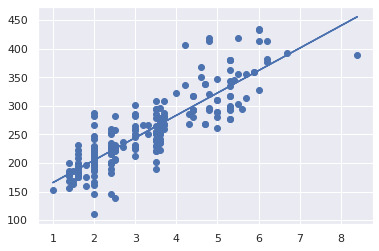

In [47]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
result=lr.predict(train_x)
plt.plot(train.ENGINESIZE,result)
plt.show()

In [48]:
from sklearn.metrics import r2_score

In [49]:
test_x=test[["ENGINESIZE"]]
test_y=test[["CO2EMISSIONS"]]
pred_y=lr.predict(test_x)

print("MEAN SQUARE ERROR:",np.mean((test_y-pred_y)**2))
print("R2_SCORE:",r2_score(test_y,pred_y))

MEAN SQUARE ERROR: CO2EMISSIONS    919.897788
dtype: float64
R2_SCORE: 0.7697808368855501
